In [1]:
import pandas as panda
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# import geopandas

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
neighborhoods_data = panda.read_csv('neighborhoods_data.csv')

In [ ]:
fire_incidents = panda.read_csv('fire_incidents_data.csv')
fire_incidents = fire_incidents[fire_incidents['neighborhood'].notna()]

In [ ]:
dict = {}

for index, row in fire_incidents.iterrows():
    if row['neighborhood'] in dict:
        dict[row['neighborhood']] += 1
    else:
        dict[row['neighborhood']] = 1

dict

{'Fineview': 49,
 'Fairywood': 26,
 'South Side Flats': 269,
 'Allegheny Center': 62,
 'Lincoln-Lemington-Belmar': 197,
 'Carrick': 289,
 'Beechview': 147,
 'Allentown': 127,
 'Beltzhoover': 129,
 'Crafton Heights': 84,
 'Homewood North': 183,
 'Squirrel Hill South': 255,
 'Perry North': 111,
 'Bedford Dwellings': 45,
 'Homewood South': 193,
 'East Allegheny': 134,
 'Crawford-Roberts': 109,
 'Sheraden': 172,
 'Middle Hill': 105,
 'Strip District': 66,
 'East Hills': 156,
 'Garfield': 112,
 'Greenfield': 117,
 'North Shore': 65,
 'Spring Hill-City View': 107,
 'Central Business District': 274,
 'Upper Hill': 46,
 'Manchester': 80,
 'Overbrook': 58,
 'Polish Hill': 39,
 'Central Lawrenceville': 77,
 'Brookline': 195,
 'Marshall-Shadeland': 145,
 'North Oakland': 129,
 'South Oakland': 96,
 'Homewood West': 62,
 'East Liberty': 208,
 'Hazelwood': 249,
 'Squirrel Hill North': 135,
 'Friendship': 32,
 'West Oakland': 62,
 'Terrace Village': 86,
 'Brighton Heights': 154,
 'Troy Hill': 84,
 '

In [ ]:
del dict['Mount Oliver Borough']
len(dict)

90

In [ ]:
fire_incidents_neighborhood = panda.DataFrame.from_dict(dict, orient='index', columns=['Frequency'])
# fire_incidents_neighborhood = panda.DataFrame([dict.keys(), dict.values()]).T
# fire_incidents_neighborhood.columns= ['Neighborhood', 'Frequency']

In [ ]:
fire_incidents_neighborhood

,Neighborhood,Frequency
0,Fineview,49
1,Fairywood,26
2,South Side Flats,269
3,Allegheny Center,62
4,Lincoln-Lemington-Belmar,197
...,...,...
85,Arlington Heights,13
86,South Shore,23
87,Oakwood,13
88,Chartiers City,17


In [ ]:
fire_incidents_neighborhood.sort_values(by=['Frequency'], ascending=False, inplace=True)

In [ ]:
max = fire_incidents_neighborhood['Frequency'].tolist()[0]
score = 210 / max
print(score)

0.726643598615917


In [ ]:
scores_list = []
max = fire_incidents_neighborhood['Frequency'].tolist()[0]

for frequency in fire_incidents_neighborhood['Frequency'].tolist():
    score = 1 - (frequency / max)
    scores_list.append(score)

In [ ]:
fire_incidents_neighborhood.insert(1, "Scores", scores_list, True)

In [ ]:
fire_incidents_neighborhood

,Frequency,Scores
Carrick,289,0.000000
Central Business District,274,0.051903
South Side Flats,269,0.069204
Squirrel Hill South,255,0.117647
Hazelwood,249,0.138408
...,...,...
Oakwood,13,0.955017
Ridgemont,12,0.958478
Mt. Oliver,12,0.958478
East Carnegie,11,0.961938


<Axes: >

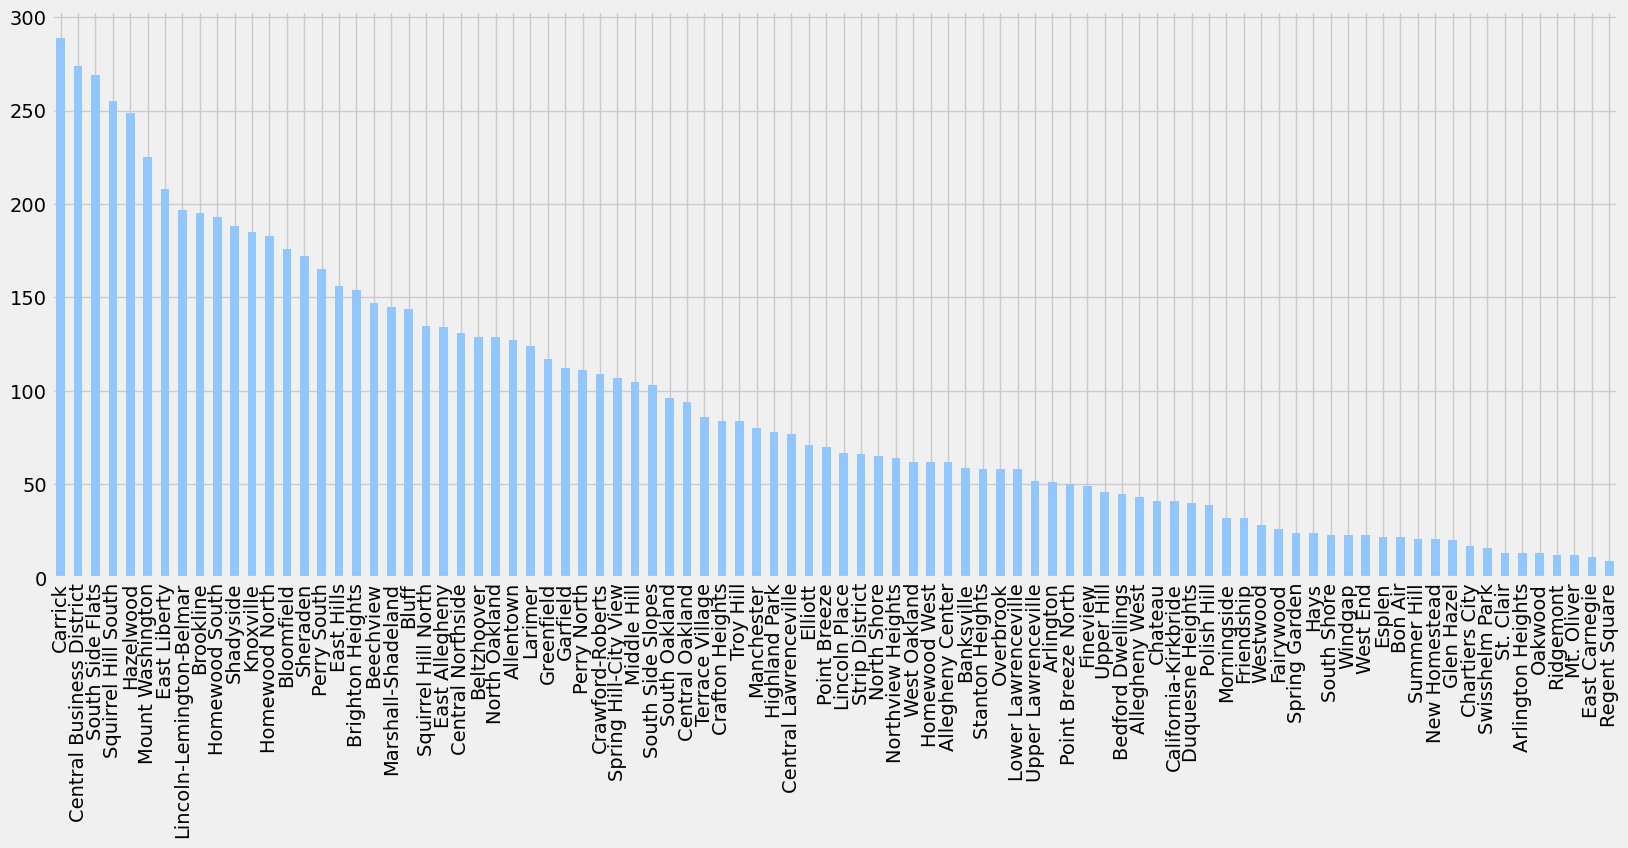

In [ ]:
plt.rcParams["figure.figsize"] = (18, 7)
plt.style.use('seaborn-v0_8-pastel')
fire_incidents_neighborhood['Scores'].plot(kind="bar")

In [ ]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
# neighborhoods.plot() # plot the geopandas dataframe

In [ ]:
steps_map = neighborhoods.merge(fire_incidents_neighborhood, 
                                how='left', 
                                left_on='hood', 
                                right_on=fire_incidents_neighborhood.index)

In [ ]:
steps_map.head()

Text(0.5, 25.523720331277886, 'Fire Incidents by Neighborhood')

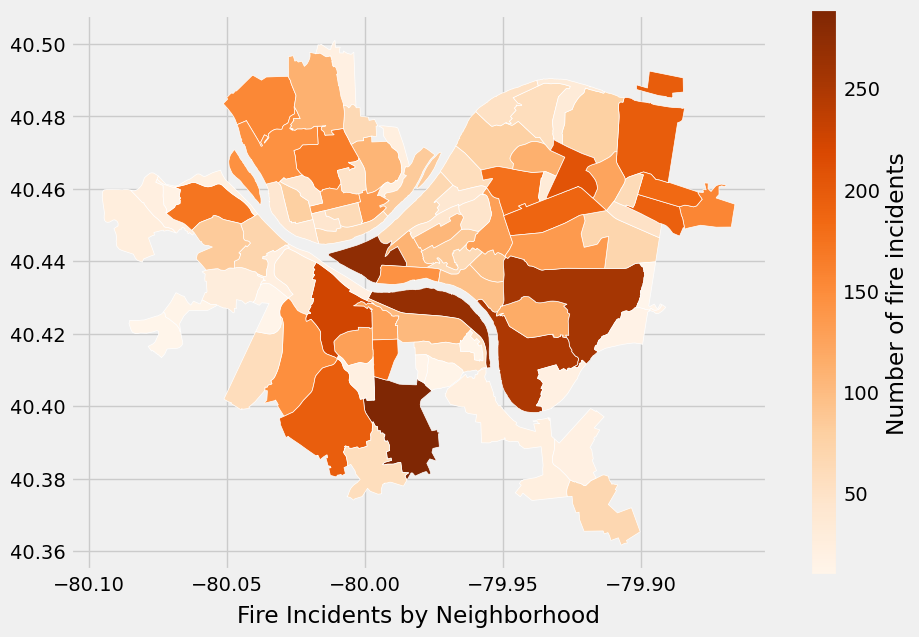

In [ ]:
# draw a choropleth map using data from the column named "number_of_steps"
steps_map.plot(column='Frequency',
               cmap='Oranges',
               edgecolor='white',
               legend=True,
               legend_kwds={'label': "Number of fire incidents"},
               figsize=(10, 7),
               missing_kwds={"color": "lightgrey"})
plt.xlabel("Fire Incidents by Neighborhood", labelpad=7)

Text(0.5, 25.523720331277886, 'Neighborhoods Score')

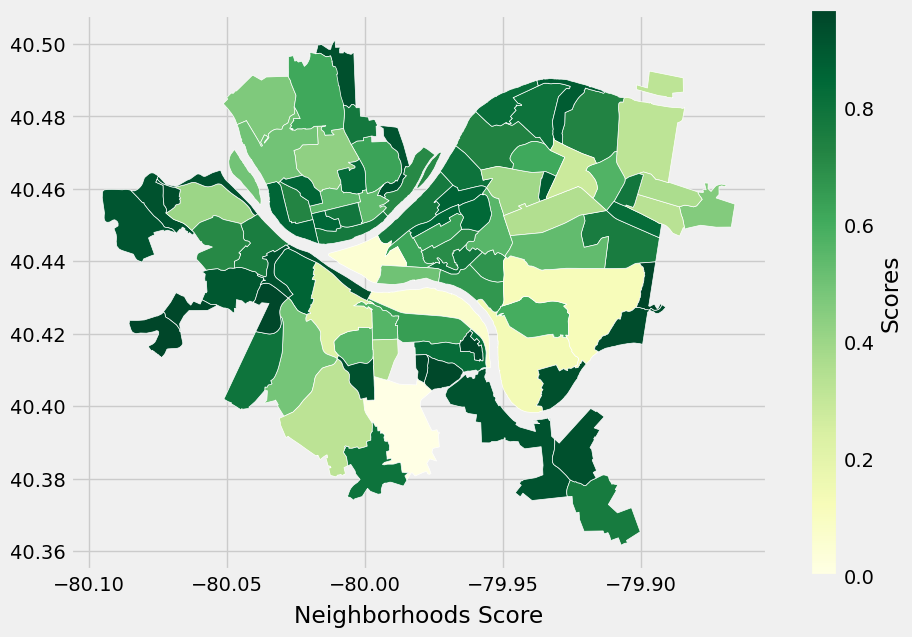

In [ ]:
steps_map.plot(column='Scores',
               cmap='YlGn',
               edgecolor='white',
               legend=True,
               legend_kwds={'label': "Scores"},
               figsize=(10, 7),
               missing_kwds={"color": "lightgrey"})
plt.xlabel("Neighborhoods Score", labelpad=7)